# Problema desafío

Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

* $$ f_{p} = 500  Hz $$
* $$ f_{s} = 1500 Hz $$
* $$ α_{max} = 1  dB $$
* $$ α_{min} = 18 dB $$

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.

Partimos de la ecuacion de transferencia para un filtro de Máxima Planicidad.

$$
\begin{vmatrix}H(s)\end{vmatrix}^{2}=\frac{1}{1+\varepsilon^2\omega^{2N}} $$

Luego necesitamos normalizar las frecuencias angulares. Vamos a tomar como norma 

$$\omega_{p}=2\pi500  => 	\Omega_{p} = 1$$

Entonces nuestras frecuencias angulares normalizadas nos quedan: 

$$ \Omega_{p} = 1  
$$ $$\Omega_{s} = 3 $$

Con los requerimientos de plantilla, calculamos epsilon 

$$\epsilon ^2 = 10^{\alpha_{min}}-1 $$

In [6]:
import math as m
alpha_max = 1    # dB
alpha_min = 18   # dB
w_p = 1
w_s =3
epsilon2 = m.pow(10, 0.1 * alpha_max) - 1

epsilon2

0.2589254117941673

Ahora con el valor de epsilon podemos calcular el orden del filtro

$$\frac{log(\tfrac{10^{\alpha_{min}*0.1}-1}{10^{\alpha_{max}*0.1}-1})}{log(3)*2} = N$$

In [11]:
N = m.log10((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1)) / (2 * m.log10(w_s))
epsilon=m.sqrt(epsilon2)
N_e=m.ceil(N)
N_e

3

**Conclusion: Vemos que el problema no se puede resolver mediante un filtro de MP con una sola celda de Orden N = 2 ya que los calculos indican que necesitamos un orden de N = 3**

b) Si el mismo diseño se planteara mediante una aproximación Chebyshev, se pide:

* la función transferencia normalizada

* las respuestas de módulo, fase y la localización de polos y ceros

# Obtencion de la transferencia 1er Metodo

La transferencia de un filtro Chebysehv es la siguiente:

$$
\begin{vmatrix}H(j\omega)\end{vmatrix}^{2}=\frac{1}{1+{C_{n}}^2} $$

Donde $C_{n}$ es:

$$ C_{n} = \epsilon.cosh[n.acosh(w)]$$

Si reemplazamos $\omega$ por $\Omega_{s} = 3$ podemos averiguar el valor de $n$. En ese punto la transferencia en veces es $α_{min}$ en veces por lo que el valor dado en la plantilla hay que pasarlo de dB a veces.

Con los requerimientos de plantilla calculamos el orden que necesitamos a partir de la transferencia para implementar el filtro con la aproximacion de Chebyshev. El epsilon de Chebyshev es el mismo que en Maxima Planicidad, pero para seguir con el lineamiento de las formulas del Schaumann epsilon estará implicito. 

$$\epsilon^2.cosh^2(n.cosh^{-1}\omega_{s}) = 10^{\alpha_{min}/10}-1$$

$$cosh(n.cosh^{-1}\omega_{s}) = \sqrt\frac{10^{\frac{\alpha_{min}}{10}-1}}{10^{\frac{\alpha_{max}}{10}-1}}$$

$$n=\frac{\cosh^{-1}\sqrt{(10^{0.1\alpha_{min}}-1)/(10^{0.1\alpha_{max}}-1)}}{cosh^{-1}\omega_{s}}$$

Para calcular el orden de un filtro Chebyshev llevamos la ultima ecuacion descripta a Python:

In [12]:
N = m.acosh(m.sqrt((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))) / m.acosh(w_s)
N = m.ceil(N)
N

2

**Obtenemos que el Orden que necesitamos para cumplir con los requerimientos es 2. 
Por lo tanto, podemos realizar el filtro con la aproximacion de Chebyseb y una celda de orden  2**

Lo que tenemos que hacer es conseguir las ubicaciones de los polos. Para eso usamos la siguiente formula:

$$a=\frac{1}{n}sinh^{-1}(\frac{1}{\epsilon})$$
$$\sigma_{k}=\pm sinh(asin(\frac{2k-1}{2n}\pi)) $$
$$\omega_{k}=cosh(a)cos(\frac{2k-1}{2n}\pi)$$
$$k=1,2,...,n$$

Para Obtener $\omega_{0k}$ y $Q_{k}$ utilizamos la siguientes ecuaciones:

$$\omega_{0k}=\sqrt{\sigma_{k}^2+\omega_{k}^2}$$
$$Q_{k}=\frac{\omega_{0k}}{2\sigma_{k}}$$

Para obtener el factor de calidad, omega y la ubicacion de los polos, traducimos las ecuaciones a Python

In [15]:
a = m.asinh(1/(m.sqrt(epsilon2)))/N

for nn in range(1,3):
    sigma = -m.sinh(a)*m.sin(((2*nn-1)/(2*N))*m.pi)
    omega =  m.cosh(a)*m.cos(((2*nn-1)/(2*N))*m.pi)
    omega_o_n = m.sqrt(sigma**2+omega**2)
    Q_n=(-1)*(omega_o_n)/(2*sigma)
    s=omega_o_n/Q_n
    print( 'Sigma_{:d}={:f},Omega_{:d}={:f},W0={:f},Q0={:f},s={:f}'.format(nn,sigma,nn,omega,omega_o_n,Q_n,s))

Sigma_1=-0.548867,Omega_1=0.895129,W0=1.050005,Q0=0.956520,s=1.097734
Sigma_2=-0.548867,Omega_2=-0.895129,W0=1.050005,Q0=0.956520,s=1.097734


Del script anterior obtuvimos $\omega_{0}=1.050005$ y $Q_{0}=0.956520$ que nos servirán para obtener nuesrta transferencia normalizada

In [17]:
w0=1.050005
q=0.956520

A continuacion presentamos nuestra transferencia normalizada que luego llenaremos con los valores calculados

$$H(s)=\frac{\omega_{0}^2}{s^2+s\frac{\omega_{0}}{Q_{0}}+\omega_{0}^2}$$

Reemplazando valores obtenemos nuestra transferencia normalizada

$$H(s)=\frac{1.050005^2}{s^2+s\frac{1.050005}{0.956520 }+1.050005^2}$$

# Verificacion de la transferencia obtenida 2do Metodo

Para verificar los valores obtenidos de la trasnferencia, procedemos a calcular los coeficientes del polinomio del filtro y como Las funciones armónicas de Chebyshev pueden ser expresadas por equivantes polinómicos que siguen una forma recursiva de serie:

$$C(N,\omega)=2wC(N−1,\omega)−C(N−2,\omega)\;con\;C(0,\omega)=1\;y\;C(1,\omega)=\omega$$

Entonces nuestro  $C(2,\omega)$ nos queda:

$$C(2,\omega)=2\omega^2-1$$

Y nuestra transferencia nos queda:

$$\begin{vmatrix}H(\omega)\end{vmatrix}^{2}=\frac{1}{1+{\varepsilon^2(2\omega^2-1)}^2} $$

Trabajando sobre el polinomio y ordenando el denominador de mayor a menor potencias nos queda:

$$\begin{vmatrix}H(\omega)\end{vmatrix}^{2}=\frac{4\varepsilon^2}{\omega^4-\omega^2+\frac{\varepsilon^2+1}{4\varepsilon^2}}$$

El modulo al cuadrado de la transferencia puede ser expresado de la siguiente forma

$$\begin{vmatrix}H(\omega)\end{vmatrix}^{2}=H(j\omega).H^{*}(j\omega)$$

ó $$\begin{vmatrix}H(\omega)\end{vmatrix}^{2}_{\mid _{\omega=\frac{s}{j}}}=H(s).H(-s)$$

$$\begin{vmatrix}H(\omega)\end{vmatrix}^{2}_{\mid _{\omega=\frac{s}{j}}}=\frac{4\varepsilon^2}{s^4+s^2+\frac{\varepsilon^2+1}{4\varepsilon^2}}$$ 

De la siguiente ecuacion podemos saber que $H(s)$ y $H(-s)$ ambas van a tener un polinomio en el denominador de grador 2

$$H(s).H(-s)=\frac{1}{(s^2+as+b)(s^2-as+b)}=\frac{4\varepsilon^2}{s^4+s^2+\frac{\varepsilon^2+1}{4\varepsilon^2}}$$

Haciendo la distributiva en el denominador obtenemos

$$H(s).H(-s)=\frac{1}{s^4+s^2(2b-a^2)+b^2}=\frac{4\varepsilon^2}{s^4+s^2+\frac{\varepsilon^2+1}{4\varepsilon^2}}$$

Igualamos los coeficientes de los polinomios por grado

$$1=2b-a^2$$ $$\frac{\varepsilon^2+1}{4\varepsilon^2}=b^2$$

Despejando $a$ y $b$ obtenemos

$a=1.09$ y $b=1.1$

Reemplazamos los valores de $a$ y $b$ en $H(s)$

$$H(s)=\frac{1.1}{s^2+s1.09+1.1}$$

**Conclusion: Vemos que siguiendos dos metodos distintos llegamos a la misma transferencia**

Para obtener las respuestas de módulo, fase y la localización de polos y ceros utilizamos el siguiente script:

Aclaracion: para obtener una transferencia mas exacta, utilizamos los valores obtenidos de la transferencia mediante el 1er metodo ya que los valores estan cargados en las variables con mas decimales.

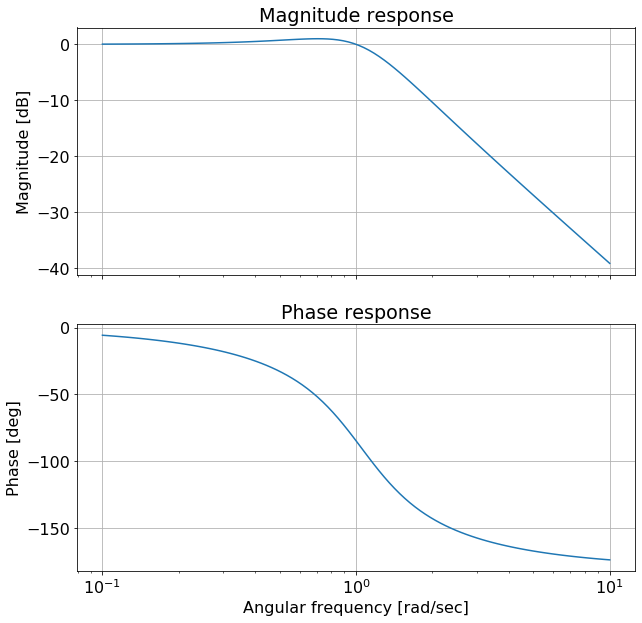

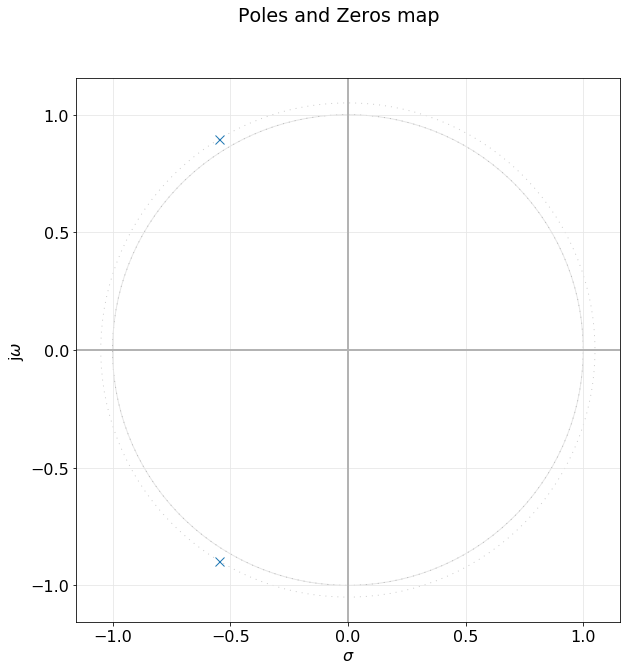

In [33]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1.050005
Q = 0.956520

# Cargamos la funcion transferencia

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

######################################################
# O podría ser en mediante los coeficientes del
# numerador y denominador

#num = np.array([ 1. ])
#den = np.array([ 1., 0.5, 1.0 ])

######################################################


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H)

plt.show()

c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.

<img src="img/filtro.png" />

La topologia requerida para realizar la sintesis es la de Ackerberg-Mossberg es el caso practico el filtro biquad de Tow-Thomas.
Con los resultados obtenidos de  $Q = 0.95$ y $\omega_{o}= 1.05$. Como no especifica una ganancia de continua, asumimos $k=1$ como asi tambien $$R=1$$  $$C=1$$
El resistor de valor $QR$:
$$QR=0.95*1=0.95$$
$$R_{1}=\frac{1}{\omega_{o}C}$$
Reemplazando Valores nos queda:
$$R_{1}=\frac{1}{1.05*1}=0.95$$
Al ser un filtro biquad tenemos disintas salias PB o PL. Como se pidío un diseño de filtro pasa bajo, nuestra salida será $V_{2}$.

Vemos una captura de pantalla del circuito realizado con TINA:

<img src="img/Captura_tina.JPG" />

Y la simulacion

<img src="img/Simu_tina.JPG" />

**Conclusiones: Vemos que el roll-off del filtro es de 40db/dec propio de un circuito de orden 2. La frecuencia de corte normalizada esta cercana a los $159mHz \equiv  \Omega_{s} = 1$**

### Desnormalizacion de los componentes

In [37]:
#Componentes normalizados
C_n  = 1
R_n  = 1
R1_n = 0.95
QR_n = 0.95
#Norma de normalizacion 
N_omega = 2 * m.pi * 500 #Norma de frecuencia
N_z     = 10000          #Norma de impedancia
# Desnormalizando
C = C_n / N_omega / N_z

R  = R_n   *  N_z
R1 = R1_n  *  N_z 
QR = QR_n  *  N_z 

print('C: {}; R: {}; R: {}; QR: {}'.format(C,R,R1,QR))


C: 3.183098861837907e-08; R: 10000; R: 9500.0; QR: 9500.0
